<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/LLuvia_MIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install catboost

In [33]:
pip install shap

In [34]:
# gestión de datos
import numpy as np
import pandas as pd

# # fechas
# import datetime as dt
# from datetime import datetime
# from dateutil.relativedelta import relativedelta

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# modelos
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier: el equivalente del Adaline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# interpretabilidad
import shap

# para visualizar mas columnas en un df
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

np.random.seed(42)

In [35]:
#Conexion
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#leemos el fichero IMDB
lluvia=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/lluvia.csv")
# Cargar archivo CSV como DataFrame ver los 5 primero registros
lluvia.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
0,0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0
1,1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0
2,2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0
3,3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0
4,4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0
5,5,1997-01-06,7.0,3.0,1.0,2.0,-1.0,-3.0,100.0,82.0,57.0,1014,1010,1008,10.0,10.0,10.0,11,5,NaN,0.0,4.0,NE,0,0,0,0,0
6,6,1997-01-07,2.0,0.0,-2.0,1.0,-1.0,-3.0,100.0,93.0,75.0,1016,1014,1009,10.0,7.0,0.0,6,2,NaN,0.0,7.0,NE,0,1,0,0,0
7,7,1997-01-08,8.0,4.0,1.0,7.0,4.0,1.0,100.0,96.0,87.0,1015,1005,1003,10.0,8.0,4.0,26,8,NaN,0.0,7.0,W,1,0,0,0,0
8,8,1997-01-09,12.0,10.0,8.0,8.0,3.0,0.0,100.0,65.0,44.0,1015,1008,1003,10.0,10.0,10.0,48,23,48.0,0.0,4.0,W,1,0,0,0,0
9,9,1997-01-10,13.0,8.0,3.0,8.0,5.0,1.0,93.0,83.0,63.0,1021,1018,1016,10.0,10.0,10.0,13,5,NaN,0.0,5.0,E,0,0,0,0,0


Utiliza df.info() para entender los tipos de datos y valores nulos

In [36]:
lluvia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6812 non-null   int64  
 1   fecha             6812 non-null   object 
 2   temperatura_max   6810 non-null   float64
 3   temperatura_med   6809 non-null   float64
 4   temperatura_min   6810 non-null   float64
 5   rocio_max         6810 non-null   float64
 6   rocio_med         6810 non-null   float64
 7   rocio_min         6810 non-null   float64
 8   humedad_max       6810 non-null   float64
 9   humedad_med       6810 non-null   float64
 10  humedad_min       6810 non-null   float64
 11  presion_max       6812 non-null   int64  
 12  presion_med       6812 non-null   int64  
 13  presion_min       6812 non-null   int64  
 14  visibilidad_max   5872 non-null   float64
 15  visibilidad_med   5872 non-null   float64
 16  visibilidad_min   5872 non-null   float64


In [37]:
lluvia.isnull().sum()
#valores nulos

,0
Unnamed: 0,0
fecha,0
temperatura_max,2
temperatura_med,3
temperatura_min,2
rocio_max,2
rocio_med,2
rocio_min,2
humedad_max,2
humedad_med,2


Transforma la columna 'fecha' a formato datetime con pd.to_datetime().

In [38]:
# Convertir la columna 'fecha' a datetime
lluvia['fecha'] = pd.to_datetime(lluvia['fecha'])

Ordena los datos por fecha con df.sort_values().

In [39]:
lluvia.sort_values('fecha', inplace=True)
lluvia.head(5)
#Ordena los datos por feca

,Unnamed: 0,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
0,0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0
1,1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0
2,2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0
3,3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0
4,4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0


Crea la columna lluvia_D+1 usando .shift(-1) para predecir la lluvia del día siguiente

In [40]:
# Crear una columna con el valor del día siguiente
lluvia['valor_D+1'] = lluvia['fecha'].shift(periods=-1)

Define una variable target con el nombre de la columna a predecir.


In [41]:
# Definimos la variable target
target = 'lluvia_D+1'

2.-**Limpieza y Preprocesamiento de Datos**

In [42]:
# Copiar el DataFrame
lluviaNew = lluvia.copy()

Rellena los valores nulos de las columnas de visibilidad, racha de viento y nubes con el valor del día anterior (ffill). yo he optado por meter la mediana en racha de viento

In [43]:
# Imputar racha_viento_max con la mediana
lluviaNew['racha_viento_max'] = lluviaNew['racha_viento_max'].fillna(lluviaNew['racha_viento_max'].median())

# Imputar nubes con ffill, ffill significa "forward fill" (relleno hacia adelante)
lluviaNew['nubes'] = lluviaNew['nubes'].fillna(method='ffill')

Elimina filas con valores nulos en la columna temperatura_med con df.dropna().

In [44]:
# Eliminar filas donde alguna de las columnas especificadas tiene valores nulos
lluviaNew = lluviaNew.dropna(subset=[
    'temperatura_max', 'temperatura_med', 'temperatura_min',
    'rocio_max', 'rocio_med', 'rocio_min',
    'humedad_max', 'humedad_med', 'humedad_min'
])

Extrae el día y mes de la columna 'fecha' con df['fecha'].dt.day y df['fecha'].dt.month, y elimina la columna original

In [45]:
# Convertir la columna 'fecha' a formato datetime
lluviaNew['fecha'] = pd.to_datetime(lluviaNew['fecha'])

# Extraer el día de la columna 'fecha' y crear una nueva columna 'dia'
lluviaNew['dia'] = lluviaNew['fecha'].dt.day

# Extraer el mes de la columna 'fecha' y crear una nueva columna 'mes'
lluviaNew['mes'] = lluviaNew['fecha'].dt.month

# Extraer el mes de la columna 'fecha' y crear una nueva columna 'año'
lluviaNew['ano'] = lluviaNew['fecha'].dt.year

Realiza One Hot Encoding en la columna 'viento_dir' para convertirla en variables numéricas. 22 viento_dir 6812 non-null object

In [46]:
# Obtener los tipos de datos únicos en la columna 'viento'
tipos_de_datos = lluviaNew['viento_dir'].unique()

print(tipos_de_datos)

['SW' 'SE' 'W' 'N' 'NE' 'E' 'NW' 'S']


In [47]:
# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(lluviaNew, columns=['viento_dir'])

print(df_encoded)

      Unnamed: 0      fecha  temperatura_max  temperatura_med  \
0              0 1997-01-01              7.0              4.0   
1              1 1997-01-02              7.0              3.0   
2              2 1997-01-03              5.0              3.0   
3              3 1997-01-04              7.0              3.0   
4              4 1997-01-05              2.0              0.0   
...          ...        ...              ...              ...   
6807        6807 2015-12-27             14.0              7.0   
6808        6808 2015-12-28             15.0              8.0   
6809        6809 2015-12-29             11.0              8.0   
6810        6810 2015-12-30              9.0              8.0   
6811        6811 2015-12-31             12.0             10.0   

      temperatura_min  rocio_max  rocio_med  rocio_min  humedad_max  \
0                 2.0        5.0        3.0        2.0        100.0   
1                 0.0        6.0        3.0        0.0        100.0   
2     

# 3.-**Análisis de Correlación y Reducción de Dimensionalidad**

Calcula la matriz de correlación con df.corr()

In [48]:
# Crea la columna lluvia_D+1 desplazando la columna ind_lluvia
df_encoded['lluvia_D+1'] = df_encoded['ind_lluvia'].shift(-1)

# Elimina la última fila, ya que tendrá un valor NaN en lluvia_D+1
df_encoded = df_encoded.dropna(subset=['lluvia_D+1'])

# Eliminar la columna 'fecha', ya que no es numérica
df_encoded = df_encoded.drop('fecha', axis=1, errors='ignore')

In [49]:
CorrelacionLluvia = df_encoded.corr()
print(CorrelacionLluvia)

                  Unnamed: 0  temperatura_max  temperatura_med  \
Unnamed: 0          1.000000         0.045446         0.041840   
temperatura_max     0.045446         1.000000         0.970992   
temperatura_med     0.041840         0.970992         1.000000   
temperatura_min     0.017639         0.856393         0.951926   
rocio_max          -0.024134         0.583988         0.691881   
rocio_med          -0.041742         0.496211         0.615373   
rocio_min          -0.069935         0.329839         0.448707   
humedad_max        -0.057408        -0.718524        -0.694993   
humedad_med        -0.094960        -0.806021        -0.742909   
humedad_min        -0.192343        -0.761443        -0.663261   
presion_max        -0.013851        -0.081634        -0.191228   
presion_med        -0.055796        -0.010997        -0.123660   
presion_min        -0.124315        -0.042493        -0.145020   
visibilidad_max     0.720007         0.126792         0.111917   
visibilida

In [50]:
# Calcula las correlaciones con la variable objetivo
CorrelacionLluvia = df_encoded.corr()['lluvia_D+1'].sort_values(ascending=False)

# Muestra las correlaciones con la variable objetivo
print(CorrelacionLluvia)

lluvia_D+1          1.000000
ind_lluvia          0.369241
nubes               0.331664
humedad_min         0.316341
humedad_med         0.291614
humedad_max         0.236970
rocio_min           0.175036
viento_dir_S        0.142855
ind_truenos         0.133330
rocio_med           0.132275
racha_viento_max    0.132110
viento_max          0.122957
precipitacion       0.112429
viento_dir_SW       0.105015
rocio_max           0.099091
viento_med          0.092590
viento_dir_SE       0.086594
ind_nieve           0.033559
viento_dir_E        0.026297
ind_niebla          0.023697
ind_granizo         0.012800
ano                 0.009446
Unnamed: 0          0.008506
valor_D+1           0.008211
dia                 0.007758
visibilidad_max    -0.013926
viento_dir_NE      -0.016698
mes                -0.024498
viento_dir_W       -0.043935
temperatura_min    -0.051082
viento_dir_NW      -0.085924
visibilidad_med    -0.116921
viento_dir_N       -0.123379
temperatura_med    -0.144188
visibilidad_mi

Visualiza la matriz de correlación con un heatmap usando Seaborn

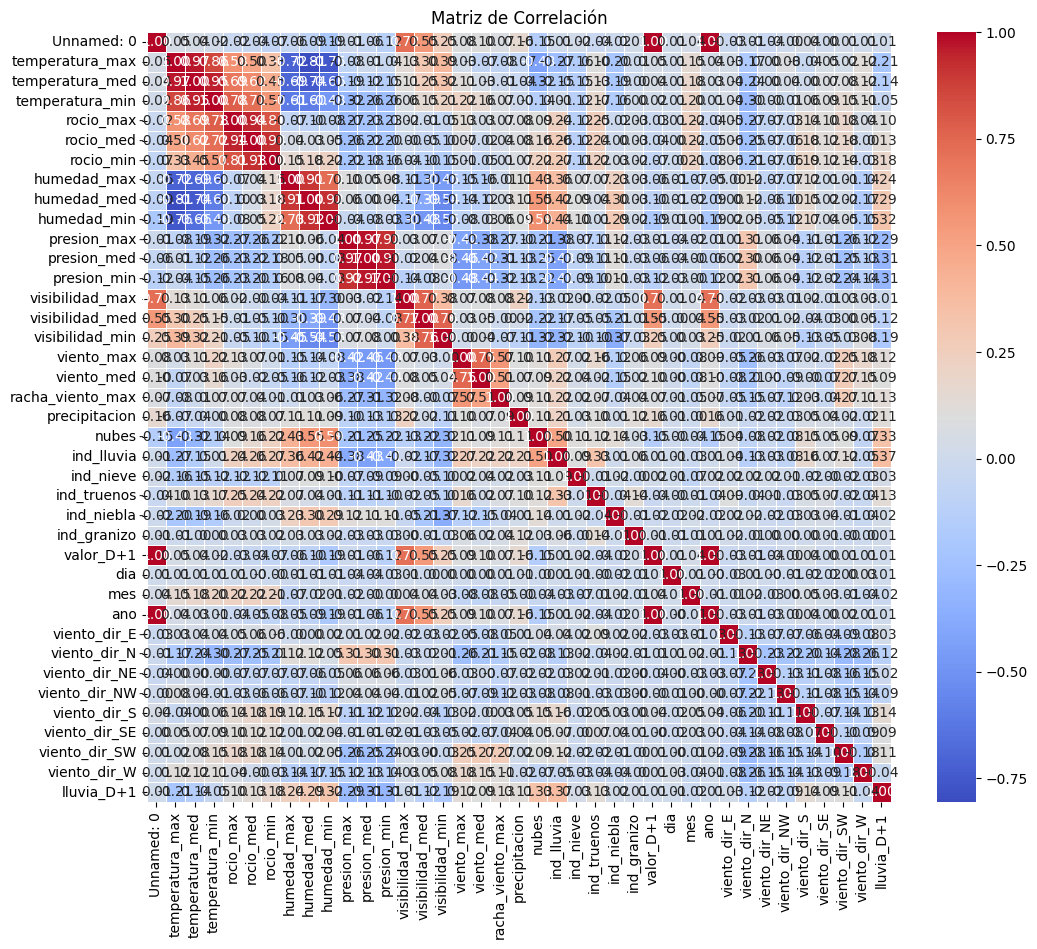

In [51]:
# Calcula la matriz de correlación
correlation_matrix = df_encoded.corr()

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 10))  # Ajusta el tamaño según sea necesario

# Crea el heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Añade un título
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()

Crea una matriz triangular de correlación para evitar duplicados

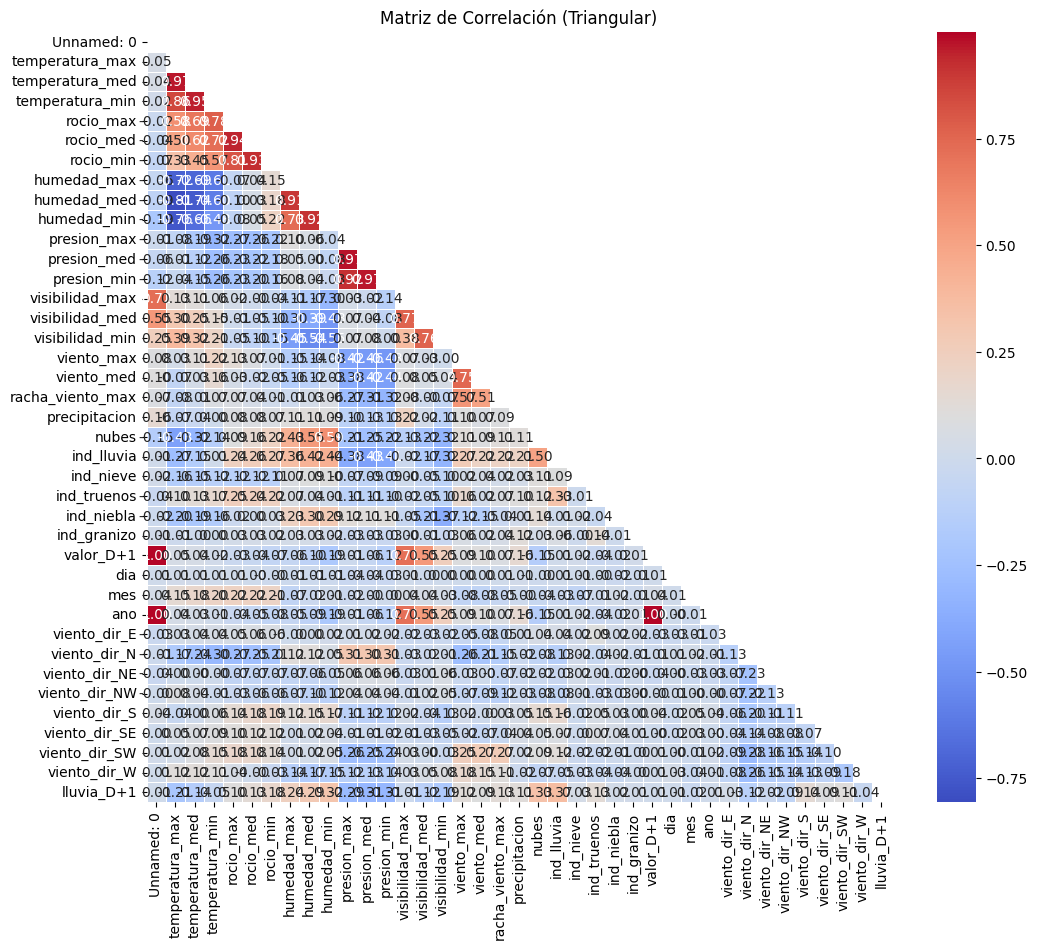

In [52]:
  # Crear una máscara para la matriz triangular superior
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear el heatmap con Seaborn
sns.heatmap(df_encoded.corr(), mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Añade un título
plt.title('Matriz de Correlación (Triangular)')

# Muestra el gráfico
plt.show()



Identifica pares de variables con correlación absoluta mayor a 0.9.

In [53]:
# Calcula la matriz de correlación
CorrelacionLluvia = df_encoded.corr()

# Crear una máscara para la parte triangular superior, incluyendo la diagonal
mask = np.triu(np.ones_like(CorrelacionLluvia, dtype=bool))

# Aplicar la máscara a la matriz de correlación
CorrelacionLluvia_upper = CorrelacionLluvia.where(mask)

# Encontrar los pares de variables con correlación absoluta mayor a 0.9
high_corr_pairs = []
for col in CorrelacionLluvia_upper.columns:
    for row in CorrelacionLluvia_upper.index:
        if col != row and abs(CorrelacionLluvia_upper.loc[row, col]) > 0.9:
            high_corr_pairs.append((row, col))

# Mostrar los pares de variables con alta correlación
for pair in high_corr_pairs:
    print(f"{pair[0]} y {pair[1]} tienen una correlación de {CorrelacionLluvia.loc[pair[0], pair[1]]}")

temperatura_max y temperatura_med tienen una correlación de 0.970992034718086
temperatura_med y temperatura_min tienen una correlación de 0.9519262616254058
rocio_max y rocio_med tienen una correlación de 0.9441680294655291
rocio_med y rocio_min tienen una correlación de 0.9271927129389229
humedad_max y humedad_med tienen una correlación de 0.9068993546996882
humedad_med y humedad_min tienen una correlación de 0.919668269081164
presion_max y presion_med tienen una correlación de 0.9730350488112759
presion_max y presion_min tienen una correlación de 0.9167783231119978
presion_med y presion_min tienen una correlación de 0.9685867692763288
Unnamed: 0 y valor_D+1 tienen una correlación de 0.99989085091823
Unnamed: 0 y ano tienen una correlación de 0.9985033597621154
valor_D+1 y ano tienen una correlación de 0.9986161988241761


Calcula las correlaciones de cada variable con la variable target

In [54]:
# Calcula las correlaciones con la variable objetivo
CorrelacionLluvia = df_encoded.corr()['lluvia_D+1'].sort_values(ascending=False)

# Muestra las correlaciones con la variable objetivo
print(CorrelacionLluvia)

lluvia_D+1          1.000000
ind_lluvia          0.369241
nubes               0.331664
humedad_min         0.316341
humedad_med         0.291614
humedad_max         0.236970
rocio_min           0.175036
viento_dir_S        0.142855
ind_truenos         0.133330
rocio_med           0.132275
racha_viento_max    0.132110
viento_max          0.122957
precipitacion       0.112429
viento_dir_SW       0.105015
rocio_max           0.099091
viento_med          0.092590
viento_dir_SE       0.086594
ind_nieve           0.033559
viento_dir_E        0.026297
ind_niebla          0.023697
ind_granizo         0.012800
ano                 0.009446
Unnamed: 0          0.008506
valor_D+1           0.008211
dia                 0.007758
visibilidad_max    -0.013926
viento_dir_NE      -0.016698
mes                -0.024498
viento_dir_W       -0.043935
temperatura_min    -0.051082
viento_dir_NW      -0.085924
visibilidad_med    -0.116921
viento_dir_N       -0.123379
temperatura_med    -0.144188
visibilidad_mi

Añade esta información al dataframe de altas correlaciones.

In [60]:
# Crear el DataFrame
df_altas_correlaciones = pd.DataFrame(high_corr_pairs, columns=['variable1', 'variable2', 'correlacion'])

# Fusionar las correlaciones con la variable objetivo
df_altas_correlaciones['corr_var1_target'] = df_altas_correlaciones['variable1'].map(CorrelacionLluvia)
df_altas_correlaciones['corr_var2_target'] = df_altas_correlaciones['variable2'].map(CorrelacionLluvia)

# Mostrar el DataFrame resultante
print(df_altas_correlaciones)

ValueError: 3 columns passed, passed data had 2 columns